## <i> <span style='color:red'>TEXT MINING-Amazon Reviews

### PROBLEM STATMENT : Perform emotional analysis on amazon product reviews

In [1]:
#Import libraries
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests

In [2]:
amazon='https://www.amazon.in/'
reviews='https://www.amazon.in/AmazonBasics-Semi-Automatic-Washing-Machine/product-reviews/B07V5W3MCB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [3]:
customer_name = []
review_title = []
rate = []
review_content = []

In [4]:
# To get all the datas from the customer reviews - name, review rating,revie title
tt = 0
while tt == 0:
    page = requests.get(reviews)
    while page.ok == False:  
        page = requests.get(reviews)
    
    
    soup = bs(page.content,'html.parser')
    soup.prettify()
    
    names = soup.find_all('span', class_='a-profile-name')
    names.pop(0)
    names.pop(0)
    
    for i in range(0,len(names)):
        customer_name.append(names[i].get_text())
        
    title = soup.find_all("a",{"data-hook":"review-title"})
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())

    rating = soup.find_all('i',class_='review-rating')
    rating.pop(0)
    rating.pop(0)
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    review = soup.find_all("span",{"data-hook":"review-body"})
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        
    try:
        for div in soup.findAll('li', attrs={'class':'a-last'}):
            A = div.find('a')['href']
        reviews = amazon + A
    except:
        break

In [5]:
print(soup.prettify())

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:feature:aui-assets -->
  <link href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41SIz69qHYL.css,21qPwhPKAAL.css,01Vctty9pOL.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11bGSgD5pDL.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,01ZfXnjPmmL.css,01oDR3IULNL.css,31ZcpBfSgNL.css,01XPHJk60-L.css,01R0k0yxPXL.css,21xVR0NtxzL.css,11gneA3MtJL.css,21fecG8pUzL.css,01RddH8vm-L.css,01CFUgsA-YL.css,21AmhU6t0s

In [6]:
len(customer_name)

477

In [7]:
#review_title

In [8]:
len(review_title)

477

In [9]:
#rate

In [10]:
len(rate)

477

In [11]:
#review_content

In [12]:
len(review_content)

477

In [13]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]

review_title[:] = [titles.rstrip('\n') for titles in review_title]

review_content[:] = [titles.lstrip('\n') for titles in review_content]

review_content[:] = [titles.rstrip('\n') for titles in review_content]

In [14]:
amazon = pd.DataFrame()

In [15]:
amazon['Customer Name'] = customer_name
amazon['Review Title'] = review_title
amazon['Rating'] = rate
amazon['Reviews'] = review_content

In [16]:
amazon.head()

,Customer Name,Review Title,Rating,Reviews
0,Raman Yadav,Washing tub is smaller as compared to whirlpoo...,3.0 out of 5 stars,Washing tub is little smaller than whirlpool...
1,Rahul Singh,Quality is not up to the mark,1.0 out of 5 stars,Drier size is not upto mark my old 6.5 kg ma...
2,Amazon Customer,7/10,4.0 out of 5 stars,Nice washing machine and dryer 👍Amazon servi...
3,Kaustubh,Buy at your own risk -No service for the product,4.0 out of 5 stars,There is no proper service provided for this...
4,Khosmendir S.,"Amazon product is defective, not being rectified",1.0 out of 5 stars,With in 3 weeks the washing machine is getti...


In [17]:
amazon.to_csv('amazon.csv',index = True)

In [18]:
data = pd.read_csv("amazon.csv",index_col=[0])

In [19]:
data.head()

,Customer Name,Review Title,Rating,Reviews
0,Raman Yadav,Washing tub is smaller as compared to whirlpoo...,3.0 out of 5 stars,Washing tub is little smaller than whirlpool...
1,Rahul Singh,Quality is not up to the mark,1.0 out of 5 stars,Drier size is not upto mark my old 6.5 kg ma...
2,Amazon Customer,7/10,4.0 out of 5 stars,Nice washing machine and dryer 👍Amazon servi...
3,Kaustubh,Buy at your own risk -No service for the product,4.0 out of 5 stars,There is no proper service provided for this...
4,Khosmendir S.,"Amazon product is defective, not being rectified",1.0 out of 5 stars,With in 3 weeks the washing machine is getti...


In [20]:
data['text']=data['Review Title']+' '+data['Reviews']

In [21]:
data

,Customer Name,Review Title,Rating,Reviews,text
0,Raman Yadav,Washing tub is smaller as compared to whirlpoo...,3.0 out of 5 stars,Washing tub is little smaller than whirlpool...,Washing tub is smaller as compared to whirlpoo...
1,Rahul Singh,Quality is not up to the mark,1.0 out of 5 stars,Drier size is not upto mark my old 6.5 kg ma...,Quality is not up to the mark Drier size is ...
2,Amazon Customer,7/10,4.0 out of 5 stars,Nice washing machine and dryer 👍Amazon servi...,7/10 Nice washing machine and dryer 👍Amazon ...
3,Kaustubh,Buy at your own risk -No service for the product,4.0 out of 5 stars,There is no proper service provided for this...,Buy at your own risk -No service for the produ...
4,Khosmendir S.,"Amazon product is defective, not being rectified",1.0 out of 5 stars,With in 3 weeks the washing machine is getti...,"Amazon product is defective, not being rectifi..."
...,...,...,...,...,...
472,Javed,Good product,3.0 out of 5 stars,Very good product ...on this price.,Good product Very good product ...on this pr...
473,sai guru raghavendra,S,3.0 out of 5 stars,Not bad,S Not bad
474,Arif,Saman halka hi,5.0 out of 5 stars,kami hi,Saman halka hi kami hi
475,KRIPAL SINGH NEGI,Semi automatic machine,5.0 out of 5 stars,Easy use,Semi automatic machine Easy use


In [22]:

import re

In [23]:
re_without_space = re.compile("(\.)|(\,)|(\{)|(\})|(\()|(\))|(\[)|(\])|(\;)|(\:)|(\!)|(\`)|(\')|(\")|(\%)|(\$)|(\<)|(\>)|(\?)|(\|)|")
re_with_space = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")
def cleantext(var):
    var = re.sub('[0-9]', '', var)
    var = re.sub(r'https?:\/\/\S+', '', var)
    var = re.sub('_', '', var.lower())
    var = re_without_space.sub('', var)
    var = re_with_space.sub(' ', var)
    return var

In [24]:
data['clean1']=data['text'].apply(cleantext)

In [25]:
data.head()

,Customer Name,Review Title,Rating,Reviews,text,clean1
0,Raman Yadav,Washing tub is smaller as compared to whirlpoo...,3.0 out of 5 stars,Washing tub is little smaller than whirlpool...,Washing tub is smaller as compared to whirlpoo...,washing tub is smaller as compared to whirlpoo...
1,Rahul Singh,Quality is not up to the mark,1.0 out of 5 stars,Drier size is not upto mark my old 6.5 kg ma...,Quality is not up to the mark Drier size is ...,quality is not up to the mark drier size is ...
2,Amazon Customer,7/10,4.0 out of 5 stars,Nice washing machine and dryer 👍Amazon servi...,7/10 Nice washing machine and dryer 👍Amazon ...,nice washing machine and dryer 👍amazon ser...
3,Kaustubh,Buy at your own risk -No service for the product,4.0 out of 5 stars,There is no proper service provided for this...,Buy at your own risk -No service for the produ...,buy at your own risk no service for the produ...
4,Khosmendir S.,"Amazon product is defective, not being rectified",1.0 out of 5 stars,With in 3 weeks the washing machine is getti...,"Amazon product is defective, not being rectifi...",amazon product is defective not being rectifie...


In [26]:
!pip install text2emotion 


In [27]:
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:

def happy(var):
    e = te.get_emotion(var)
    return e.get('Happy')

def angry(var):
    e = te.get_emotion(var)
    return e.get('Angry')

def fear(var):
    e = te.get_emotion(var)
    return e.get('Fear')

def sad(var):
    e = te.get_emotion(var)
    return e.get('Sad')

def surprise(var):
    e = te.get_emotion(var)
    return e.get('Surprise')


In [29]:
data['Happy']=data['clean1'].apply(happy)

In [30]:
data['Angry']=data['clean1'].apply(angry)
data['Fear']=data['clean1'].apply(fear)
data['Sad']=data['clean1'].apply(sad)
data['Surprise']=data['clean1'].apply(surprise)

In [31]:
data.head()

,Customer Name,Review Title,Rating,Reviews,text,clean1,Happy,Angry,Fear,Sad,Surprise
0,Raman Yadav,Washing tub is smaller as compared to whirlpoo...,3.0 out of 5 stars,Washing tub is little smaller than whirlpool...,Washing tub is smaller as compared to whirlpoo...,washing tub is smaller as compared to whirlpoo...,0.25,0.0,0.50,0.17,0.08
1,Rahul Singh,Quality is not up to the mark,1.0 out of 5 stars,Drier size is not upto mark my old 6.5 kg ma...,Quality is not up to the mark Drier size is ...,quality is not up to the mark drier size is ...,0.10,0.0,0.40,0.50,0.00
2,Amazon Customer,7/10,4.0 out of 5 stars,Nice washing machine and dryer 👍Amazon servi...,7/10 Nice washing machine and dryer 👍Amazon ...,nice washing machine and dryer 👍amazon ser...,0.60,0.0,0.40,0.00,0.00
3,Kaustubh,Buy at your own risk -No service for the product,4.0 out of 5 stars,There is no proper service provided for this...,Buy at your own risk -No service for the produ...,buy at your own risk no service for the produ...,0.22,0.0,0.11,0.22,0.44
4,Khosmendir S.,"Amazon product is defective, not being rectified",1.0 out of 5 stars,With in 3 weeks the washing machine is getti...,"Amazon product is defective, not being rectifi...",amazon product is defective not being rectifie...,0.08,0.0,0.67,0.17,0.08


In [32]:
import matplotlib.pyplot as plt

In [33]:
happy_score=data['Happy'].sum()
angry_score=data['Angry'].sum()
fear_score=data['Fear'].sum()
sad_score=data['Sad'].sum()
surprise_score=data['Surprise'].sum()

In [34]:
mylabels=['happy','angry','fear','sad','surprise']

In [35]:
mylabels


['happy', 'angry', 'fear', 'sad', 'surprise']

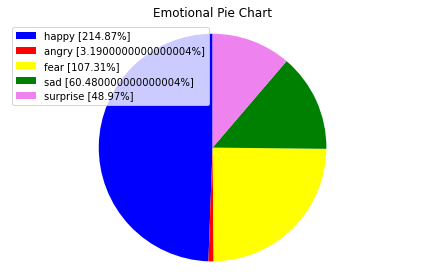

In [36]:
labels = ['happy ['+str(happy_score)+'%]', 'angry ['+str(angry_score)+'%]', 
'fear ['+str(fear_score)+'%]','sad ['+str(sad_score)+'%]','surprise ['+str(surprise_score)+'%]']

total=[happy_score,angry_score,fear_score,sad_score,surprise_score]

colors = ['blue','red','yellow','green','violet']
patches, texts = plt.pie(total, colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("Emotional Pie Chart")
plt.axis('equal')
plt.tight_layout()




## Inference
### From the above result its pretty much clear that the reviews from customers in amazon ,for semi automatic washing machine is very happy. And the second majority is coming under the category, fear